In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import torch
import crocoddyl
import numpy as np
from neural_net import *
from terminal_model import *
from utils import *

In [4]:
net = torch.load("net2.pth")

In [9]:
# starting configurations

starting_positions = circular()

In [65]:
regular_cost  = []
regular_iters = []
regular_traj  = []

warmstart_cost  = []
warmstart_iters = []
warmstart_traj  = []

for xyz in starting_positions:
    model = crocoddyl.ActionModelUnicycle()
    T = 30
    model.costWeights = np.matrix([1,1]).T
    problem = crocoddyl.ShootingProblem(m2a(xyz).T, [ model ] * T, model)
    ddp = crocoddyl.SolverDDP(problem)
    ddp.solve([], [], 1000)
    regular_cost.append(ddp.cost)
    regular_iters.append(ddp.iter)
    xs_ = np.array(ddp.xs)
    xs = xs_[:,0:2] 
    regular_traj.append(xs)
    ddp_xs = [np.array(xs) + 1e-5 for xs in ddp.xs]

    model2 = crocoddyl.ActionModelUnicycle()
    #terminal_model = UnicycleTerminal(net)
    model2.costWeights = np.matrix([1,1]).T
    problem2 = crocoddyl.ShootingProblem(m2a(xyz).T, [ model2 ] * T, model)
    ddp2 = crocoddyl.SolverDDP(problem2)
    ddp2.solve(ddp_xs , ddp.us, 1000)
    warmstart_cost.append(ddp2.cost)
    warmstart_iters.append(ddp2.iter)
    xs2_ = np.array(ddp2.xs)
    xs2 = xs2_[:,0:2]
    warmstart_traj.append(xs2)
    

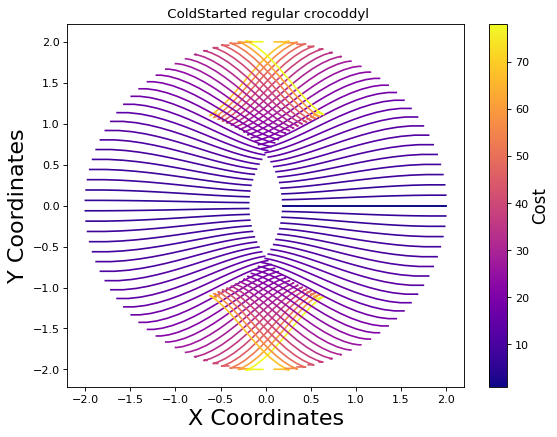

In [58]:
plot_trajectories(regular_iters, regular_traj,
                  title=" ColdStarted regular crocoddyl",
                  savename = "iterations"
                 )

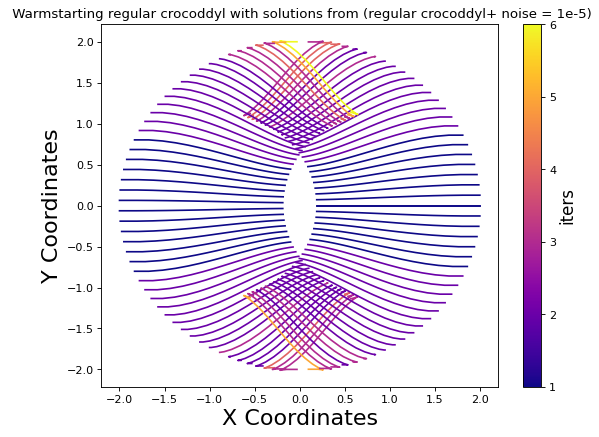

In [66]:
plot_trajectories(warmstart_iters, warmstart_traj,name = "iters",
                  title=" Warmstarting regular crocoddyl with solutions from (regular crocoddyl+ noise = 1e-5)",
                 savename = "iters3")